# HI MASS PER GAXALY OF THE SYSTEM ARP86

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS


In [13]:
# observational data
data_cube = fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/S2349+2904_HIcube2_clean_smooth_image_5_cube_kms.fits")
data_header =fits.getheader("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/S2349+2904_HIcube2_clean_smooth_image_5_cube_kms.fits")
# mask 
data_mask= fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/S2349+2904_HIcube2_clean_smooth_image_5_mask_kms.fits")

In [4]:
# apply the mask 
masked_data = np.where(data_mask, data_cube, 0)

In [3]:
# fucntion to calculate the HI mass of the galaxy
def computeHImass(masked_data, data_header):
    Npix_beam = (1.133*data_header['BMAJ']*data_header['BMIN'])/(abs(data_header['CDELT1'])*abs(data_header['CDELT2'])) # number of pixels per beam
    S_int_value = (np.nansum(masked_data)*abs(data_header['CDELT3'])*1e-3)/Npix_beam # Jy km/s
    D = 66.63 #Nasa extragalactic database
    M_HI = 2.356e5 * D**2 * S_int_value # solar masses
    return M_HI

In [14]:
Npix_beam = (1.133*data_header['BMAJ']*data_header['BMIN'])/(abs(data_header['CDELT1'])*abs(data_header['CDELT2'])) # number of pixels per beam
S_int_value = (np.nansum(masked_data)*abs(data_header['CDELT3'])*1e-3)/Npix_beam # Jy km/s

In [19]:
# totla HI mass
D = 66.63 #Nasa extragalactic database
M_HI = 2.356e5 * D**2 * S_int_value # solar masses
print(f"HI Mass: {format(M_HI,".2e")} solar masses") 

HI Mass: 2.11e+10 solar masses


## HI mass of each galaxy

In [20]:
data_ngc7753 = fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/ngc7753_cube1.fits")
header_ngc7753 = fits.getheader("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/ngc7753_cube1.fits")    

In [23]:
HImassNgc7753=computeHImass(data_ngc7753, header_ngc7753)
print(f"HI Mass of NGC7753: {format(HImassNgc7753,".2e")} solar masses")

HI Mass of NGC7753: 1.07e+10 solar masses


In [25]:
data_ngc7752   = fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7752/ngc7752_cube1.fits")
header_ngc7752 = fits.getheader("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7752/ngc7752_cube1.fits")

In [26]:
HImassNgc7752=computeHImass(data_ngc7752, header_ngc7752)
print(f"HI Mass of NGC7752: {format(HImassNgc7752,".2e")} solar masses")

HI Mass of NGC7752: 2.69e+09 solar masses


In [27]:
data_USNOA   = fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/USNOA2-1125-19940303/arp86-3_cube1.fits")
header_USNOA = fits.getheader("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/USNOA2-1125-19940303/arp86-3_cube1.fits")


In [28]:
HImassUSNOA=computeHImass(data_USNOA, header_USNOA)
print(f"HI Mass of USNOA2-1125-19940303: {format(HImassUSNOA,".2e")} solar masses") 

HI Mass of USNOA2-1125-19940303: 4.06e+09 solar masses


## HI Mass of residuals

In [11]:
# data of the model NGC7753
directory_7753 = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/"
data_model_ngc7753 = fits.getdata(directory_7753 + "output3/SoFiA_J234703.61+292835.6/SoFiA_J234703.61+292835.6mod_azim.fits")

# data for the model ngc7752
directory_7752 = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7752/"
data_model_ngc7752 = fits.getdata(directory_7752 + "output/SoFiA_J234703.61+292835.6/SoFiA_J234703.61+292835.6mod_azim.fits")
data_ngc7752 = fits.getdata(directory_7752 + "ngc7752_cube1.fits")

# data for the model of the companion galaxy 2MASXJ23470758+2926531
directory_companion = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/USNOA2-1125-19940303/"
data_model_companion = fits.getdata(directory_companion+"output/SoFiA_J234703.61+292835.6/SoFiA_J234703.61+292835.6mod_azim.fits")
data_arp3 = fits.getdata(directory_companion + "arp86-3_cube1.fits")


In [23]:
residuals= (data_cube - data_model_ngc7753-data_model_ngc7752-data_model_companion)
data_res_masked = np.where(data_mask, residuals, 0)
data_res_masked = np.where(data_res_masked<0,0,data_res_masked)

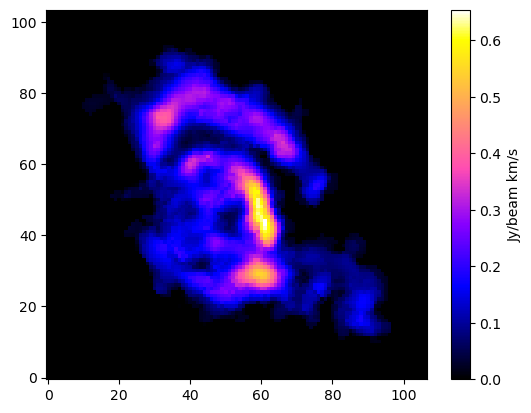

In [24]:
mom0_residual = np.nansum(data_res_masked, axis=0) * abs(data_residual_header['CDELT3']) * 1e-3 # Jy/beam km/s
#mom0_residual = np.where(mom0_residual < 0, 0, mom0_residual)
plt.imshow(mom0_residual, origin='lower', cmap='gnuplot2')
plt.colorbar(label='Jy/beam km/s')

In [25]:
HImassResidual=computeHImass(data_res_masked, data_residual_header)
print(f"HI Mass of the residual: {format(HImassResidual,".2e")} solar masses")

HI Mass of the residual: 1.19e+10 solar masses
